Ingrese el precio del producto pagando al contado: $100000


 ¿Existe algún descuento por pagar en efectivo (sólo el número)? (s/n: s para SÍ, n para NO): n

 Ingrese el monto final pagando en cuotas: $150000

 Ingrese el número de cuotas mensuales: 12

 Ingrese la inflación mensual esperada como una tasa porcentual 
(sólo el número, por ej.: 3.5 si es 3.5% mensual):  6
 
 Las cuotas actualizadas teniendo en cuenta la inflación dada, son las siguientes: 

 Cuota 1: $11792.45

 Cuota 2: $11124.96

 Cuota 3: $10495.24

 Cuota 4: $9901.17

 Cuota 5: $9340.73

 Cuota 6: $8812.01

 Cuota 7: $8313.21

 Cuota 8: $7842.65

 Cuota 9: $7398.73

 Cuota 10: $6979.93

 Cuota 11: $6584.84

 Cuota 12: $6212.12

 Suma total: 104798.05


 El valor presente de la suma de las cuotas actualizadas es: $104798.05, por lo que comparando este valor 
con el valor de contado (con o sin descuento, según el caso):


<span style='font-size:20pt;font-weight:bold;text-decoration:underline'>
 LE CONVIENE PAGAR EL PRODUCTO AL CONTADO.</span>

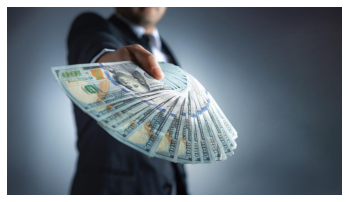


 El AHORRO en este caso, en comparación con la otra forma de pago sería de: $4798.05


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import Markdown


"""El precio al contado y el posible descuento, en caso de aplicar, están desdoblados en funciones diferentes, cuyos outputs 
serán relacionados posteriormente en la variable cash_final."""
def precio_contado():
    while True:
        try:
            precio = float(input("Ingrese el precio del producto pagando al contado: $"))
            return precio
        except ValueError:
            print("El valor ingresado no es válido. Intente nuevamente ingresando un valor numérico.")
        
"""La siguiente función se encarga de aplicar el descuento sobre el monto por pago al contado. En caso de NO haber descuento 
por pago en efectivo, el mismo es nulo, tal como definí en la variable: descuento = 0.0"""
def descuento_efectivo():
    descuento = 0.0
    respuesta = ""
    while respuesta not in ["s", "n"]:
        try:
            respuesta = input("\n\n ¿Existe algún descuento por pagar en efectivo (sólo el número)? (s/n: s para SÍ, n para NO): ")
        except:
            print("Se produjo un error. Ingresar una respuesta válida, s o n)")
    if respuesta == "s":
        while True:
            try:
                porcentaje = float(input("Ingresar por el porcentaje de descuento por abonar en efectivo (sólo el número): "))
                descuento = porcentaje / 100.0
                break
            except ValueError:
                print("Error: Ingresa un número válido")
    return descuento

# Con esta función actualizo los valores de las cuotas teniendo en cuenta la tasa de inflación proporcionada por el usuario.
def valor_presente(monto, cuotas, tasa_inflacion):
    cuota_mensual = monto / cuotas
    vp = 0.0
    valores = []
    print(" \n Las cuotas actualizadas teniendo en cuenta la inflación dada, son las siguientes: ")
    for i in range(1, cuotas+1):
        cuota_actualizada = cuota_mensual / (1.0 + float(tasa_inflacion)/100.0)**(i)
        vp += cuota_actualizada
        valores.append([f"Cuota {i}", cuota_actualizada])
        print(f"\n Cuota {i}: ${cuota_actualizada:.2f}")
        df = pd.DataFrame(valores, columns=["Cuota", "Valor"]) # creo un DataFrame con las cuotas actualizadas.
        df.to_csv("cuotas.csv", index=False) # guardo el DataFrame en un archivo CSV llamado "cuotas.csv".
    print(f"\n Suma total: {vp:.2f}")
    return vp


def ingresar_valor_numerico(mensaje):
    while True:
        try:
            valor = float(input(mensaje))
            return float(valor)    
        
        except ValueError:
            print("Error: Debe ingresar un valor numérico.")
            
            
# Llamado a las primeras dos funciones. 
contado = precio_contado()
descuento = descuento_efectivo()

# Cálculo del precio al contado (con o sin descuento)
cash_final = contado * (1.0 - descuento)

# Ingreso de datos referentes al pago con tarjeta de crédito. 
monto_cuotas = (ingresar_valor_numerico("\n Ingrese el monto final pagando en cuotas: $"))
num_cuotas = int(ingresar_valor_numerico("\n Ingrese el número de cuotas mensuales: "))
tasa_inflacion = (ingresar_valor_numerico("""\n Ingrese la inflación mensual esperada como una tasa porcentual 
(sólo el número, por ej.: 3.5 si es 3.5% mensual):  """))


# Calculo el valor presente de las cuotas actualizadas por la inflación.
vp_cuotas = valor_presente(monto_cuotas, num_cuotas, tasa_inflacion)

print(f"""\n\n El valor presente de la suma de las cuotas actualizadas es: ${vp_cuotas:.2f}, por lo que comparando este valor 
con el valor de contado (con o sin descuento, según el caso):""")

# Comparo los precios y muestro la recomendación final.
if vp_cuotas < cash_final:     
    text1 = "\n LE CONVIENE PAGAR EL PRODUCTO EN CUOTAS CON LA TARJETA DE CRÉDITO."
    display(Markdown(f"<span style='font-size:18pt;font-weight:bold;text-decoration:underline'>{text1}</span>"))
    # Carga la imagen desde un archivo
    ruta_imagen = "C:/Users/estal/Downloads/card.jpg"
    imagen = imread(ruta_imagen)
    # Muestra la imagen utilizando matplotlib
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()    
    print(f"\n El AHORRO en este caso, en comparación con la otra forma de pago, sería de: ${cash_final-vp_cuotas:.2f}")
else:
    text2 = "\n LE CONVIENE PAGAR EL PRODUCTO AL CONTADO."
    display(Markdown(f"<span style='font-size:20pt;font-weight:bold;text-decoration:underline'>{text2}</span>"))
    # Carga la imagen desde un archivo
    ruta_imagen = "C:/Users/estal/Downloads/cash.jpg"
    imagen = imread(ruta_imagen)
    #Muestra la imagen utilizando matplotlib
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()
    print(f"\n El AHORRO en este caso, en comparación con la otra forma de pago sería de: ${vp_cuotas-cash_final:.2f}")
    
    
    
# Hola, soy Esteban. Las finanzas son una de mis pasiones y escribí este script en Python que permite:
# - Decidir si conviene hacer un pago en efectivo ("cash", con o sin descuento!) o en cuotas con una tarjeta de crédito. 
# - Indicar el ahorro implicado en cada caso.
# - Ver el valor de las cuotas actualizadas y almacenarlas en un archivo CSV para su uso posterior (ej.: para un control mensual). 
# Para ello, se le pide al usuario una serie de entradas como ser: el monto a pagar en efectivo (con o sin descuento), el monto 
# final pagando en cuotas, el número de cuotas y la tasa de inflación mensual estimada. Respecto al código, he intentado manejar 
# posibles errores con cláusulas try-except y hacer hincapié en la modularidad del código. Espero que les resulte de interés y 
# quedo abierto a comentarios para optimizar el código y aumentar su eficiencia. Un saludo!